## Notebook for Data Annotation Visualization

A simple notebook for visualizing ground truth data with the annotated bounding booxes.

Change the image and annotation path as per your dataset directory path.

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import glob as glob
import random
import numpy as np

from xml.etree import ElementTree as et

np.random.seed(100)

In [20]:
image_paths = os.path.join(
    '..',
    'data',
    'Stream1',
    'train'
)
annotation_paths = os.path.join(
    '..',
    'data',
    'Stream1',
    'train'
)

In [21]:
CLASSES = [
    'proba_2',
    'cheops',
    'debris',
    'double_star',
    'earth_observation_sat_1',
    'lisa_pathfinder',
    'proba_3_csc',
    'proba_3_ocs',
    'smart_1',
    'soho',
    'xmm_newton',
]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [22]:
images = glob.glob(os.path.join(image_paths, '*.jpg'))
annotations = glob.glob(os.path.join(annotation_paths, '*.xml'))

images.sort()
annotations.sort()

# Randomize in same order.
random.Random(42).shuffle(images)
random.Random(42).shuffle(annotations)

In [23]:
def read_annotations(xml_path):
    tree = et.parse(xml_path)
    root = tree.getroot()
    
    boxes = []
    labels = []

    # Get the height and width of the image.
    image_width = image.shape[1]
    image_height = image.shape[0]

    # Box coordinates for xml files are extracted and corrected for image size given.
    for member in root.findall('object'):
        labels.append(member.find('name').text)
        # xmin = left corner x-coordinates
        xmin = int(member.find('bndbox').find('xmin').text)
        # xmax = right corner x-coordinates
        xmax = int(member.find('bndbox').find('xmax').text)
        # ymin = left corner y-coordinates
        ymin = int(member.find('bndbox').find('ymin').text)
        # ymax = right corner y-coordinates
        ymax = int(member.find('bndbox').find('ymax').text)
        
        boxes.append([xmin, ymin, xmax, ymax])
    return boxes, labels

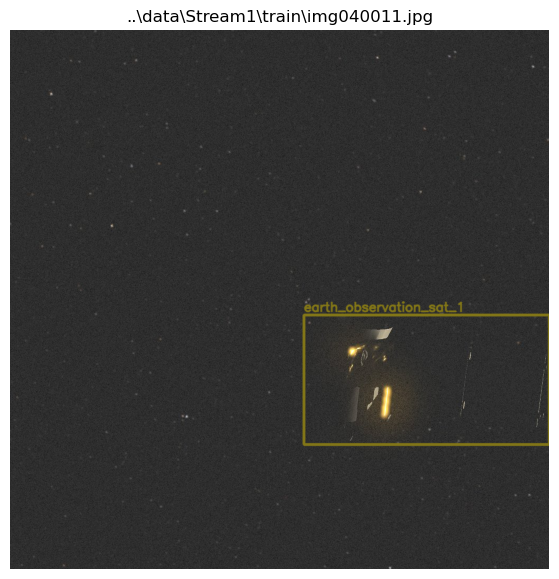

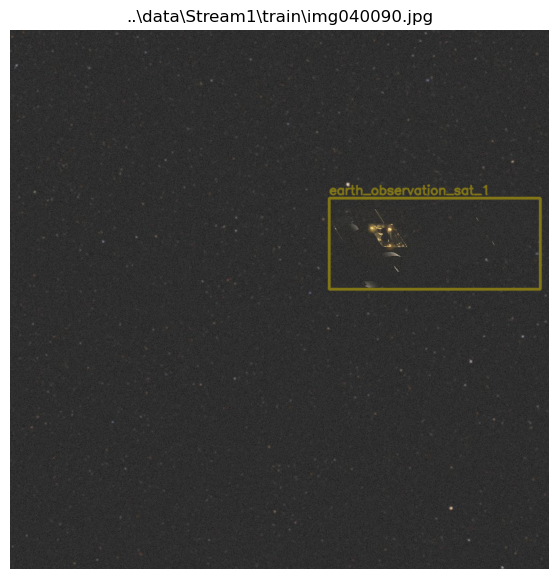

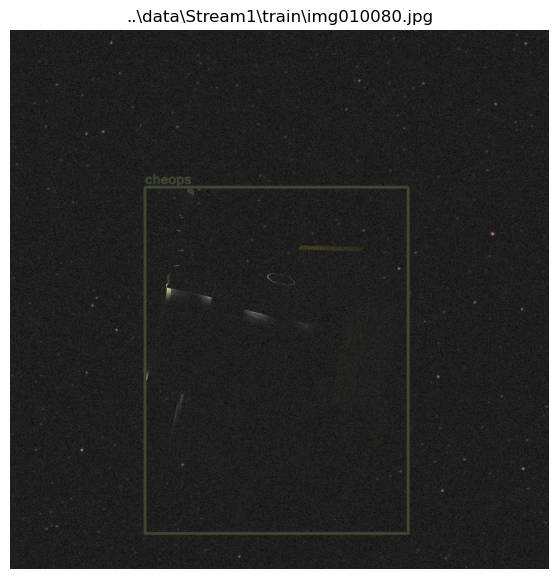

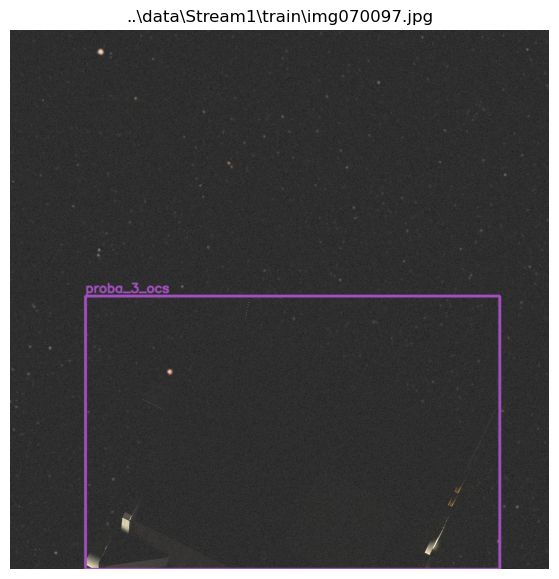

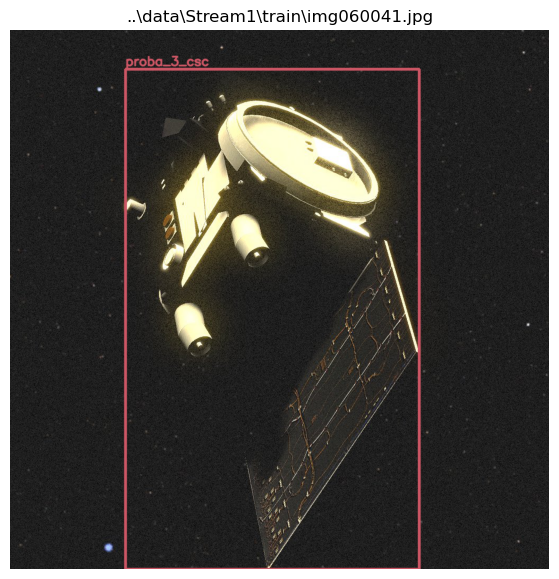

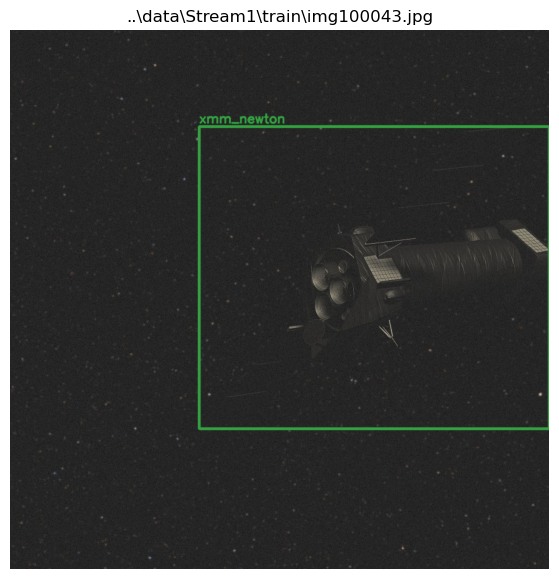

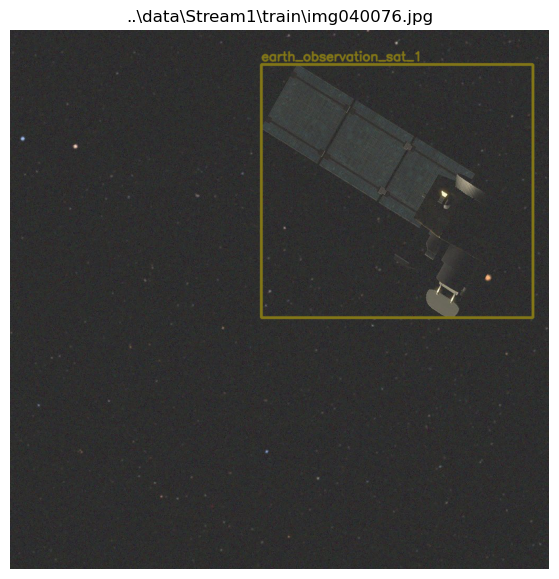

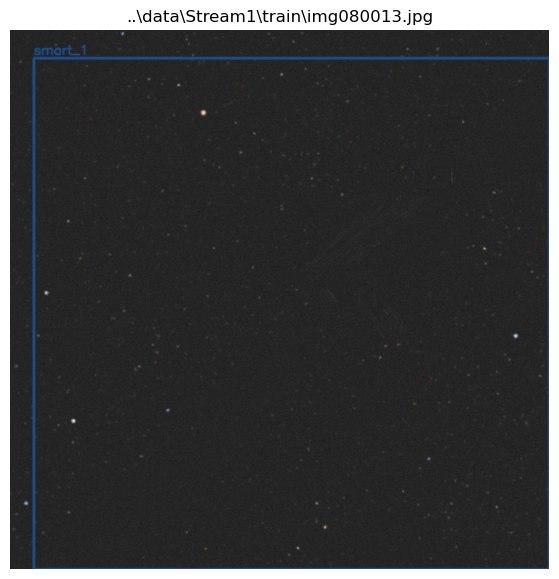

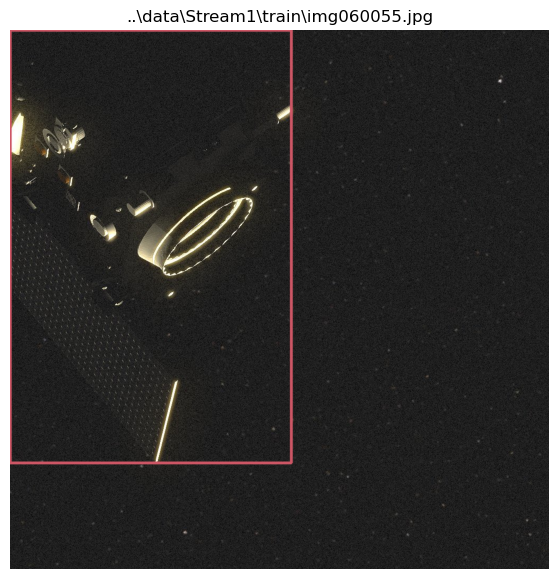

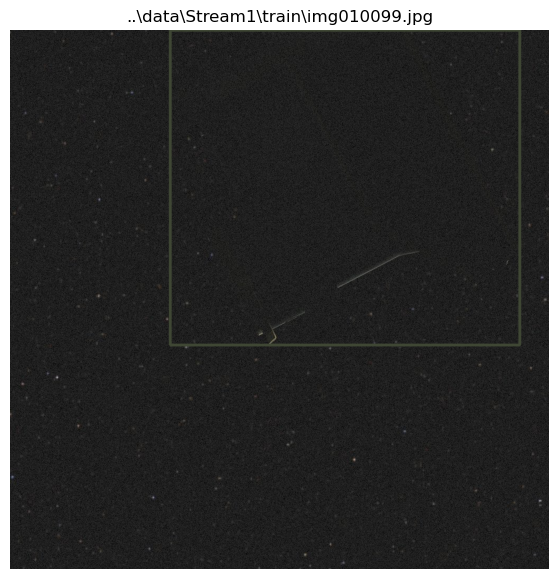

<Figure size 1000x700 with 0 Axes>

In [24]:
for data_num, image_path in enumerate(images):
    image = cv2.imread(image_path)
    xml_path = annotations[data_num]
    boxes, labels = read_annotations(xml_path)
    plt.figure(figsize=(10, 7))
    for i, box in enumerate(boxes):
        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]
        class_name = labels[i]
        color = COLORS[CLASSES.index(class_name)]
        cv2.rectangle(
            image, 
            (int(xmin), int(ymin)),
            (int(xmax), int(ymax)),
            color=color,
            thickness=3,
            lineType=cv2.LINE_AA
        )
        cv2.putText(
            image,
            text=labels[i],
            org=(int(xmin), int(ymin-7)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.8,
            color=color,
            thickness=2,
            lineType=cv2.LINE_AA
        )
    if data_num == 10:
        break
    plt.title(image_path.split('/')[-1])
    plt.imshow(image[:, :, ::-1])
    plt.axis('off')
    plt.show()